In [1]:
import paddlehub as hub
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import math

In [26]:
# src_img = cv2.imread('ref2_f - Copy.jpg')
print(img.shape)

(352, 286, 3)


[2020-04-28 10:40:33,654] [    INFO] - Installing face_landmark_localization module
[2020-04-28 10:40:33,656] [    INFO] - Module face_landmark_localization already installed in /root/.paddlehub/modules/face_landmark_localization
[2020-04-28 10:40:33,656] [    INFO] - Installing ultra_light_fast_generic_face_detector_1mb_640 module
[2020-04-28 10:40:33,657] [    INFO] - Module ultra_light_fast_generic_face_detector_1mb_640 already installed in /root/.paddlehub/modules/ultra_light_fast_generic_face_detector_1mb_640


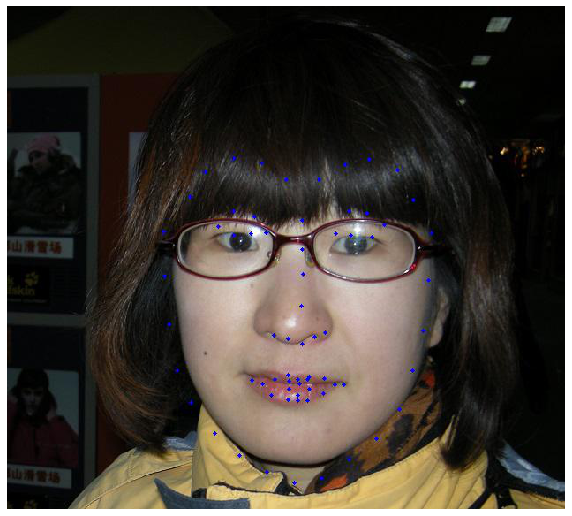

In [85]:
# src_img = cv2.imread('ref2_f - Copy.jpg')
from skimage import io
src_img = io.imread('ermao_head.jpg')
module = hub.Module(name="face_landmark_localization")
result = module.keypoint_detection(images=[src_img])

tmp_img = src_img.copy()
for index, point in enumerate(result[0]['data'][0]):
	# print(point)
	# cv2.putText(img, str(index), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_COMPLEX, 3, (0,0,255), -1)
	cv2.circle(tmp_img, (int(point[0]), int(point[1])), 2, (0, 0, 255), -1)

res_img_path = 'face_landmark.jpg'
io.imsave(res_img_path, tmp_img)

img = mpimg.imread(res_img_path) 
# 展示预测68个关键点结果
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

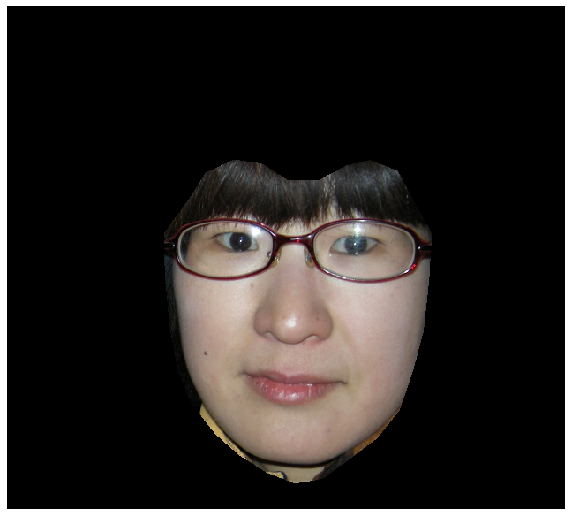

In [91]:
data_raw=np.asarray(result[0]['data'][0])
landmarks=data_raw.clip(min=0,max= src_img.shape[1])
# print(data_raw,'\n----------------------------\n',landmarks)

outline = landmarks[[*range(17), *range(26,16,-1)]]
# landmarks
from skimage.draw import polygon
Y, X = polygon(outline[:,1], outline[:,0])
cropped_img = np.zeros(src_img.shape, dtype=np.uint8)
cropped_img[Y, X] = src_img[Y, X]
plt.figure(figsize=(10,10))
plt.imshow(cropped_img) 
plt.axis('off') 
plt.show()

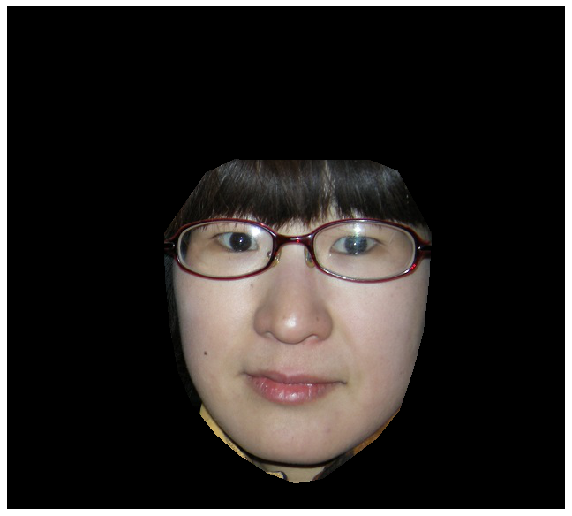

In [92]:
from scipy.spatial import ConvexHull
vertices = ConvexHull(landmarks).vertices
Y, X = skimage.draw.polygon(landmarks[vertices, 1], landmarks[vertices, 0])
cropped_img = np.zeros(img.shape, dtype=np.uint8)
cropped_img[Y, X] = src_img[Y, X]
plt.figure(figsize=(10,10))
plt.imshow(cropped_img) 
plt.axis('off') 
plt.show()

In [93]:
def crop_face(img_src, landmarks):
    landmarks = np.asarray(landmarks).clip(min=0, max=img_src.shape[1])
    # print(data_raw,'\n----------------------------\n',landmarks)
    # outline = landmarks[[*range(17), *range(26, 16, -1)]] # 68 points
    # Y, X = polygon(outline[:, 1], outline[:, 0])
    # cropped_img = np.zeros(src_img.shape, dtype=np.uint8)
    # cropped_img[Y, X] = img_src[Y, X]
    vertices = ConvexHull(landmarks).vertices
    Y, X = polygon(landmarks[vertices, 1], landmarks[vertices, 0])
    print(f'=========={Y, X}==============')
    img_out = np.zeros(img_src.shape, dtype=np.uint8)
    img_out[Y, X] = img_src[Y, X]
    return img_out, [Y, X]

[2020-04-28 11:10:34,383] [    INFO] - Installing face_landmark_localization module
[2020-04-28 11:10:34,384] [    INFO] - Module face_landmark_localization already installed in /root/.paddlehub/modules/face_landmark_localization
[2020-04-28 11:10:34,385] [    INFO] - Installing ultra_light_fast_generic_face_detector_1mb_640 module
[2020-04-28 11:10:34,386] [    INFO] - Module ultra_light_fast_generic_face_detector_1mb_640 already installed in /root/.paddlehub/modules/ultra_light_fast_generic_face_detector_1mb_640


==========(array([173, 173, 173, ..., 539, 539, 539]), array([257, 258, 259, ..., 328, 329, 330]))==============


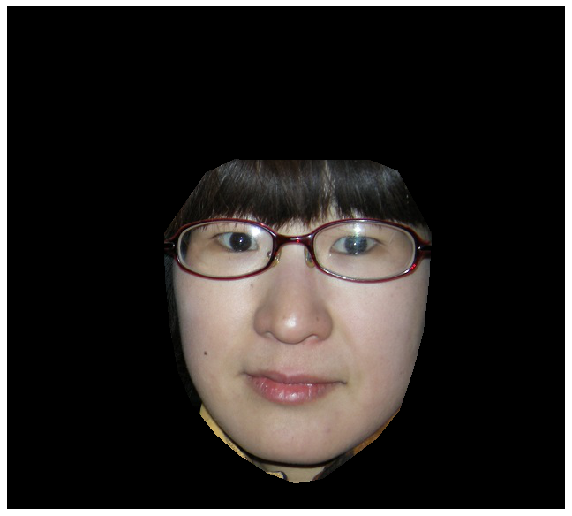

In [101]:
xxxxx = io.imread('ermao_head.jpg')
module = hub.Module(name="face_landmark_localization")
result = module.keypoint_detection(images=[xxxxx])
landmarks=result[0]['data'][0]
xx_ou,y_x = crop_face(xxxxx,landmarks)
plt.figure(figsize=(10,10))
plt.imshow(xx_ou) 
plt.axis('off') 
plt.show()

In [112]:
print(xxxxx.shape,xx_ou.shape)

(569, 632, 3) (569, 632, 3)


In [110]:
print(list(zip(y_x[0],y_x[1])))

[(173, 257), (173, 258), (173, 259), (173, 260), (173, 261), (173, 262), (174, 255), (174, 256), (174, 257), (174, 258), (174, 259), (174, 260), (174, 261), (174, 262), (174, 263), (174, 264), (174, 265), (174, 266), (174, 267), (174, 268), (174, 269), (174, 270), (174, 271), (174, 272), (174, 273), (174, 274), (174, 275), (174, 276), (174, 277), (174, 278), (174, 279), (174, 280), (174, 281), (174, 282), (174, 283), (174, 284), (174, 285), (174, 286), (174, 287), (174, 288), (174, 289), (174, 290), (174, 291), (174, 292), (174, 293), (174, 294), (174, 295), (174, 296), (174, 297), (174, 298), (174, 299), (174, 300), (174, 301), (174, 302), (174, 303), (174, 304), (174, 305), (174, 306), (174, 307), (174, 308), (174, 309), (174, 310), (174, 311), (174, 312), (174, 313), (174, 314), (174, 315), (174, 316), (174, 317), (174, 318), (174, 319), (174, 320), (174, 321), (174, 322), (174, 323), (174, 324), (174, 325), (174, 326), (174, 327), (174, 328), (174, 329), (174, 330), (174, 331), (17

In [4]:
def thin_face(image, face_landmark):
    """
    实现自动人像瘦脸
    image： 人像图片
    face_landmark: 人脸关键点
    """
    end_point = face_landmark[30]

    # 瘦左脸，3号点到5号点的距离作为瘦脸距离
    dist_left = np.linalg.norm(face_landmark[3] - face_landmark[5])
    local_traslation_warp(image, face_landmark[3], end_point, dist_left)

    # 瘦右脸，13号点到15号点的距离作为瘦脸距离
    dist_right = np.linalg.norm(face_landmark[13] - face_landmark[15])
    image = local_traslation_warp(image, face_landmark[13], end_point, dist_right)
    return image

In [5]:
def local_traslation_warp(image, start_point, end_point, radius):
    """
    局部平移算法
    """
    radius_square = math.pow(radius, 2)
    image_cp = image.copy()

    dist_se = math.pow(np.linalg.norm(end_point - start_point), 2)
    height, width, channel = image.shape
    for i in range(width):
        for j in range(height):
            # 计算该点是否在形变圆的范围之内
            # 优化，第一步，直接判断是会在（start_point[0], start_point[1])的矩阵框中
            if math.fabs(i - start_point[0]) > radius and math.fabs(j - start_point[1]) > radius:
                continue

            distance = (i - start_point[0]) * (i - start_point[0]) + (j - start_point[1]) * (j - start_point[1])

            if (distance < radius_square):
                # 计算出（i,j）坐标的原坐标
                # 计算公式中右边平方号里的部分
                ratio = (radius_square - distance) / (radius_square - distance + dist_se)
                ratio = ratio * ratio

                # 映射原位置
                new_x = i - ratio * (end_point[0] - start_point[0])
                new_y = j - ratio * (end_point[1] - start_point[1])

                new_x = new_x if new_x >=0 else 0
                new_x = new_x if new_x < height-1 else height-2
                new_y = new_y if new_y >= 0 else 0
                new_y = new_y if new_y < width-1 else width-2

                # 根据双线性插值法得到new_x, new_y的值
                image_cp[j, i] = bilinear_insert(image, new_x, new_y)
                
    return image_cp

def bilinear_insert(image, new_x, new_y):
    """
    双线性插值法
    """
    w, h, c = image.shape
    if c == 3:
        x1 = int(new_x)
        x2 = x1 + 1
        y1 = int(new_y)
        y2 = y1 + 1

        part1 = image[y1, x1].astype(np.float) * (float(x2) - new_x) * (float(y2) - new_y)
        part2 = image[y1, x2].astype(np.float) * (new_x - float(x1)) * (float(y2) - new_y)
        part3 = image[y2, x1].astype(np.float) * (float(x2) - new_x) * (new_y - float(y1))
        part4 = image[y2, x2].astype(np.float) * (new_x - float(x1)) * (new_y - float(y1))

        insertValue = part1 + part2 + part3 + part4

        return insertValue.astype(np.int8)

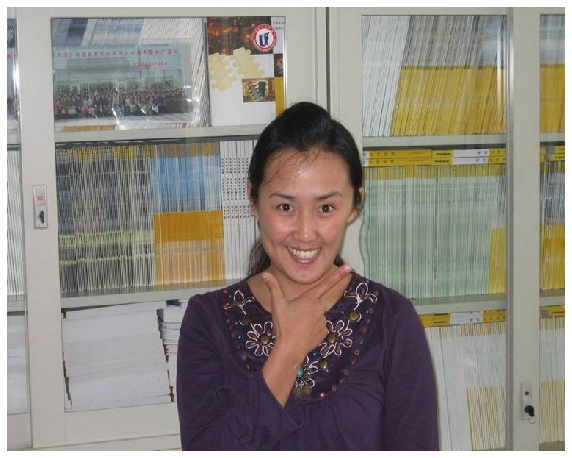

In [6]:
face_landmark = np.array(result[0]['data'][0], dtype='int')

src_img = thin_face(src_img, face_landmark)

res_img_path = 'res.jpg'
cv2.imwrite(res_img_path, src_img)

img = mpimg.imread(res_img_path) 
# 展示瘦脸图片
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

In [8]:
def enlarge_eyes(image, face_landmark, radius=15, strength=10):
    """
    放大眼睛
    image： 人像图片
    face_landmark: 人脸关键点
    radius: 眼睛放大范围半径
    strength：眼睛放大程度
    """
    # 以左眼最低点和最高点之间的中点为圆心
    left_eye_top = face_landmark[37]
    left_eye_bottom = face_landmark[41]
    left_eye_center = (left_eye_top + left_eye_bottom)/2
    # 以右眼最低点和最高点之间的中点为圆心
    right_eye_top = face_landmark[43]
    right_eye_bottom = face_landmark[47]
    right_eye_center = (right_eye_top + right_eye_bottom)/2

    # 放大双眼
    local_zoom_warp(image, left_eye_center, radius=radius, strength=strength)
    local_zoom_warp(image, right_eye_center, radius=radius, strength=strength)
def local_zoom_warp(image, point, radius, strength):
    """
    图像局部缩放算法
    """
    height = image.shape[0]
    width = image.shape[1]      
    left =int(point[0] - radius) if point[0] - radius >= 0 else 0
    top = int(point[1] - radius) if point[1] - radius >= 0 else 0
    right = int(point[0] + radius) if point[0] + radius < width else width-1
    bottom = int(point[1] + radius) if point[1] + radius < height  else height-1

    radius_square = math.pow(radius, 2)
    for y in range(top, bottom):
        offset_y = y - point[1]
        for x in range(left, right):
            offset_x = x - point[0]
            dist_xy = offset_x * offset_x + offset_y * offset_y

            if dist_xy <= radius_square:
                scale = 1 - dist_xy / radius_square
                scale = 1 - strength / 100 * scale
                new_x = offset_x * scale + point[0]
                new_y = offset_y * scale + point[1]
                new_x = new_x if new_x >=0 else 0
                new_x = new_x if new_x < height-1 else height-2
                new_y = new_y if new_y >= 0 else 0
                new_y = new_y if new_y < width-1 else width-2

                image[y, x] = bilinear_insert(image, new_x, new_y)

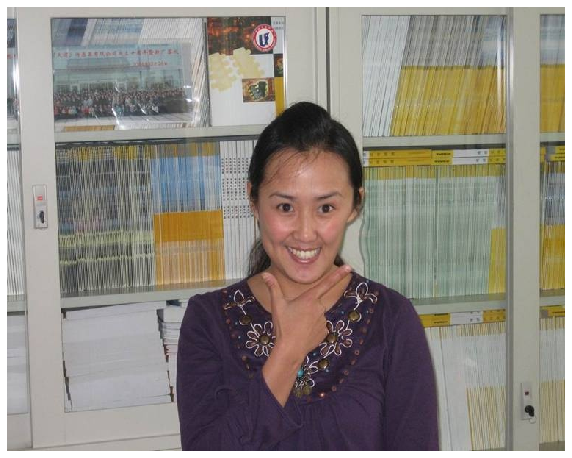

In [9]:
enlarge_eyes(src_img, face_landmark, radius=13, strength=13)

cv2.imwrite(res_img_path, src_img)

img = mpimg.imread(res_img_path) 
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

In [11]:
def rouge(image, face_landmark, ruby=True):
    """
    自动涂口红
    image： 人像图片
    face_landmark: 人脸关键点
    ruby：是否需要深色口红
    """
    image_cp = image.copy()

    if ruby:
        rouge_color = (0,0,255)
    else:
    	rouge_color = (0,0,200)

    points=face_landmark[48:68]
    
    hull = cv2.convexHull(points)
    cv2.drawContours(image, [hull], -1, rouge_color, -1)
    cv2.addWeighted(image, 0.2, image_cp, 1-0.1, 0, image_cp)
    return image_cp

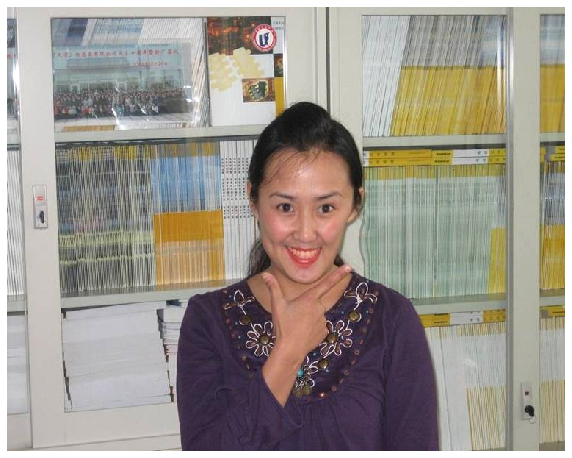

In [12]:
src_img = rouge(src_img, face_landmark)

cv2.imwrite(res_img_path, src_img)

img = mpimg.imread(res_img_path) 
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()

In [14]:
def whitening(img, face_landmark):
	"""
	美白
	"""
	# 简单估计额头所在区域
	# 根据0号、16号点画出额头(以0号、16号点所在线段为直径的半圆)
	radius=(np.linalg.norm(face_landmark[0] - face_landmark[16]) / 2).astype('int32')
	center_abs=tuple(((face_landmark[0] + face_landmark[16]) / 2).astype('int32'))
	angle=np.degrees(np.arctan((lambda l:l[1]/l[0])(face_landmark[16]-face_landmark[0]))).astype('int32')
	face = np.zeros_like(img)
	cv2.ellipse(face,center_abs,(radius,radius),angle,180,360,(255,255,255),2)

	points=face_landmark[0:17]
	hull = cv2.convexHull(points)
	cv2.polylines(face, [hull], True, (255,255,255), 2)

	index = face >0
	face[index] = img[index]
	dst = np.zeros_like(face)
	# v1:磨皮程度
	v1 = 3
	# v2: 细节程度
	v2 = 2

	tmp1 = cv2.bilateralFilter(face, v1 * 5, v1 * 12.5, v1 * 12.5)
	tmp1 = cv2.subtract(tmp1,face)
	tmp1 = cv2.add(tmp1,(10,10,10,128))
	tmp1 = cv2.GaussianBlur(tmp1,(2*v2 - 1,2*v2-1),0)
	tmp1 = cv2.add(img,tmp1)
	dst = cv2.addWeighted(img, 0.1, tmp1, 0.9, 0.0)
	dst = cv2.add(dst,(10, 10, 10,255))

	index = dst>0
	img[index] = dst[index]

	return img

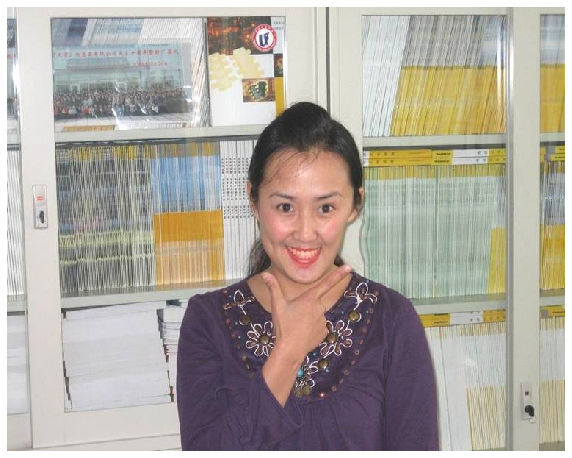

In [15]:
src_img = whitening(src_img, face_landmark)

cv2.imwrite(res_img_path, src_img)

img = mpimg.imread(res_img_path) 
plt.figure(figsize=(10,10))
plt.imshow(img) 
plt.axis('off') 
plt.show()